In [14]:
import warnings
warnings.filterwarnings(action='ignore')

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train=pd.read_csv("train_bsd.csv")
test=pd.read_csv("test_bsd.csv")

print(train.shape)
print(test.shape)

datasets=[train,test]

(10886, 12)
(6493, 9)


# 1. weather

<Axes: xlabel='weather', ylabel='count'>

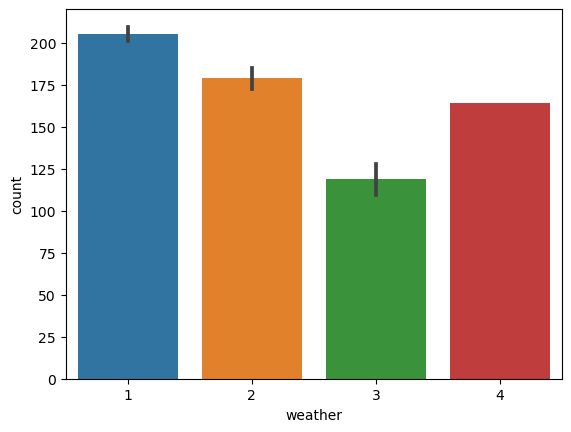

In [16]:
sns.barplot(data=train,x="weather",y="count")

In [17]:
train["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [18]:
test["weather"].value_counts()

weather
1    4221
2    1710
3     560
4       2
Name: count, dtype: int64

In [19]:
train[train["weather"]==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [20]:
test[test["weather"]==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980


## idea
1. "4"를 제거
2. or "4"를 "3"으로 치환
3. 1~4 &rarr; dummy variables로 전환

# 2. windspeed

<Axes: xlabel='windspeed', ylabel='Density'>

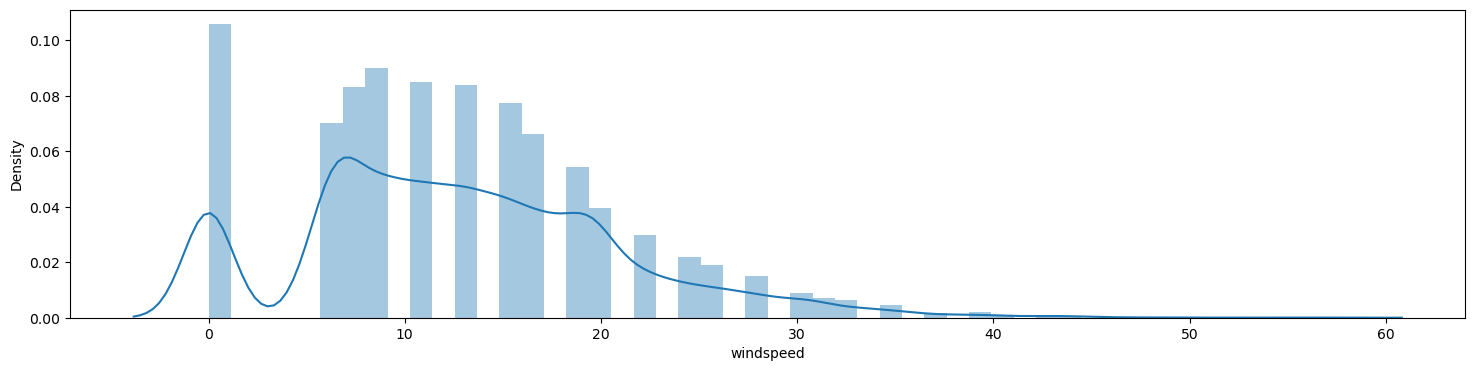

In [21]:
plt.figure(figsize=(18,4))
sns.distplot(train["windspeed"])

In [24]:
train["windspeed"].head(50)

0      0.0000
1      0.0000
2      0.0000
3      0.0000
4      0.0000
5      6.0032
6      0.0000
7      0.0000
8      0.0000
9      0.0000
10    16.9979
11    19.0012
12    19.0012
13    19.9995
14    19.0012
15    19.9995
16    19.9995
17    19.0012
18    16.9979
19    16.9979
20    16.9979
21    12.9980
22    15.0013
23    19.9995
24    19.9995
25    16.9979
26    19.0012
27    12.9980
28    12.9980
29    19.9995
30    12.9980
31    15.0013
32    15.0013
33    15.0013
34    16.9979
35    19.9995
36     8.9981
37    12.9980
38    11.0014
39    11.0014
40    12.9980
41    22.0028
42    30.0026
43    23.9994
44    22.0028
45    19.9995
46    11.0014
47    23.9994
48    27.9993
49    26.0027
Name: windspeed, dtype: float64

In [30]:
train["windspeed"]=train['windspeed'].astype("int")
train["windspeed"].head(30)

0      0
1      0
2      0
3      0
4      0
5      6
6      0
7      0
8      0
9      0
10    16
11    19
12    19
13    19
14    19
15    19
16    19
17    19
18    16
19    16
20    16
21    12
22    15
23    19
24    19
25    16
26    19
27    12
28    12
29    19
Name: windspeed, dtype: int64

# 3. temp vs atemp

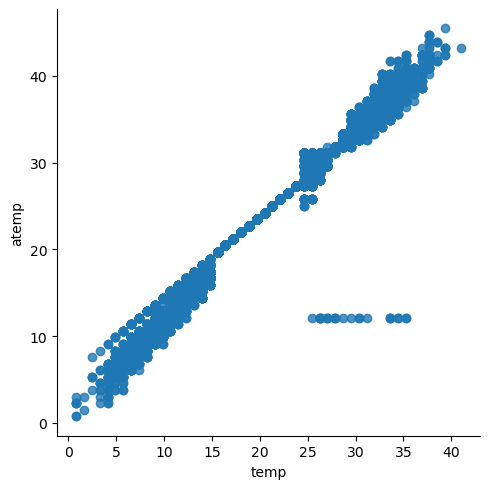

In [31]:
sns.lmplot(data=train,x="temp",y="atemp",fit_reg=False)

<Axes: xlabel='temp', ylabel='atemp'>

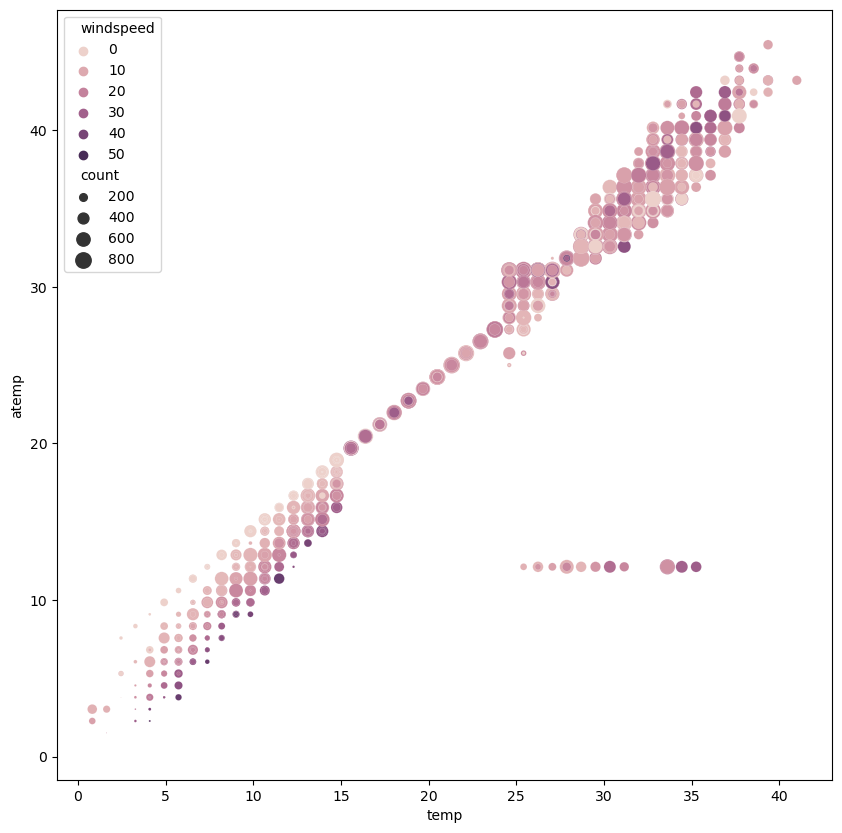

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=train,x="temp",y="atemp",size="count",sizes=(0,150),hue="windspeed")

In [39]:
train["temp(diff)"]=train["atemp"]-train["temp"]
train[["temp(diff)","atemp","temp"]]

,temp(diff),atemp,temp
0,4.555,14.395,9.84
1,4.615,13.635,9.02
2,4.615,13.635,9.02
3,4.555,14.395,9.84
4,4.555,14.395,9.84
...,...,...,...
10881,4.115,19.695,15.58
10882,2.665,17.425,14.76
10883,1.970,15.910,13.94
10884,3.485,17.425,13.94


<Axes: xlabel='temp(diff)', ylabel='count'>

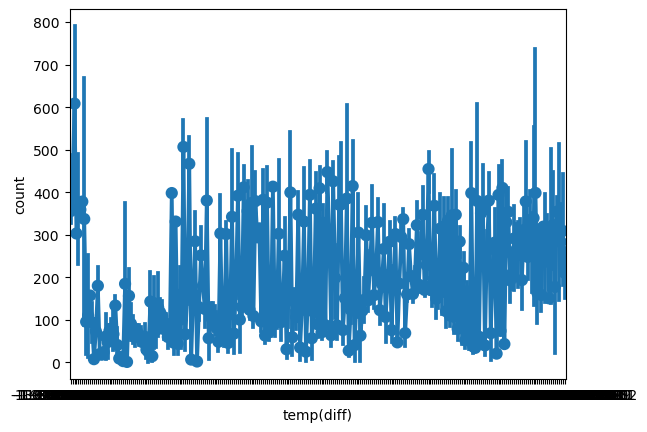

In [40]:
sns.pointplot(data=train,x="temp(diff)",y="count")

<Axes: xlabel='temp(diff_round)', ylabel='count'>

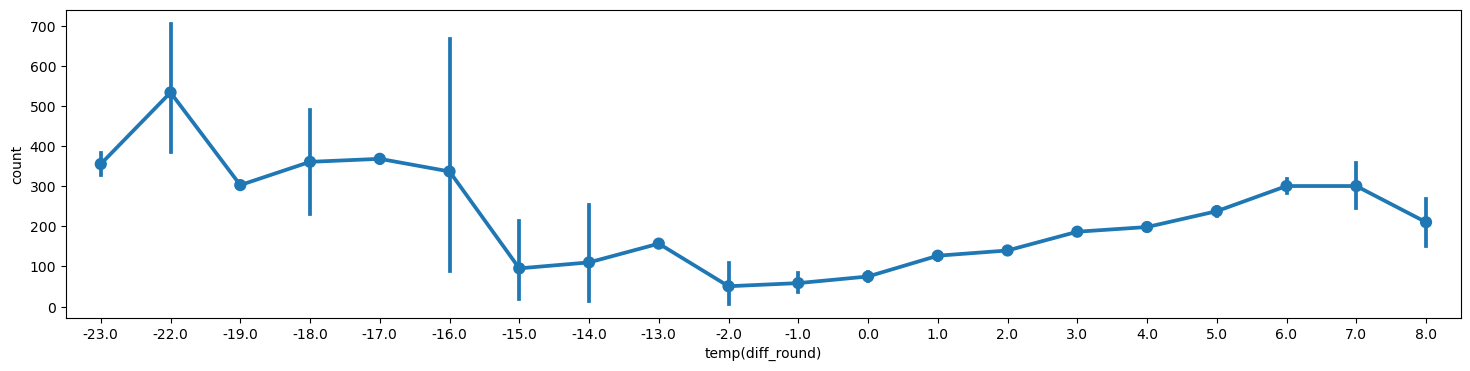

In [42]:
train["temp(diff_round)"]=train["temp(diff)"].round()
plt.figure(figsize=(18,4))
sns.pointplot(data=train,x="temp(diff_round)",y="count")

In [44]:
train["temp(diff_round)"].value_counts()

temp(diff_round)
 4.0     5214
 3.0     1926
 2.0     1331
 5.0     1106
 1.0      581
 6.0      448
 0.0      195
 7.0       32
-1.0       23
-14.0       5
-22.0       5
-2.0        4
-15.0       3
-16.0       3
-17.0       2
-18.0       2
 8.0        2
-23.0       2
-13.0       1
-19.0       1
Name: count, dtype: int64

### 6보다 크거나 0보다 작은 data -> 모수가 부족
### 따라서,
1. 6보다 큰 것 &rarr; 6으로 통일
2. 0보다 작은 것 &rarr; 0으로 통일

In [45]:
train.loc[train["temp(diff_round)"]>6, "temp(diff_round)"]=6
train.loc[train["temp(diff_round)"]<0, "temp(diff_round)"]=0
train["temp(diff_round)"].value_counts()

temp(diff_round)
4.0    5214
3.0    1926
2.0    1331
5.0    1106
1.0     581
6.0     482
0.0     246
Name: count, dtype: int64

<Axes: xlabel='temp(diff_round)', ylabel='count'>

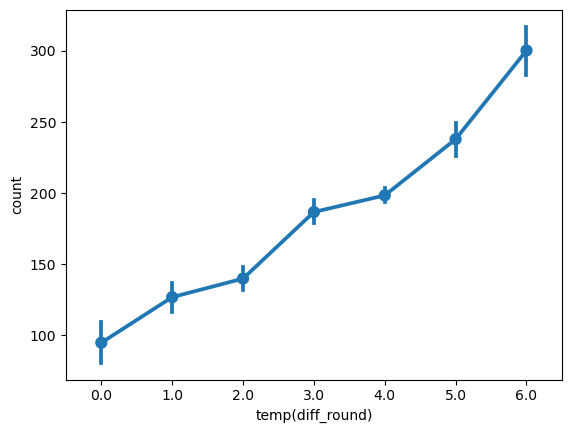

In [46]:
sns.pointplot(data=train,x="temp(diff_round)",y="count")

# 4. datetime 중 dayofweek (요일 정보)

In [47]:
train["datetime"].head()

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
Name: datetime, dtype: object

In [52]:
for dataset in datasets:
    dataset['datetime']=pd.to_datetime(dataset["datetime"])
    dataset["datetime"].head()

In [53]:
train["datetime"].dt.day_name()

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: datetime, Length: 10886, dtype: object

In [54]:
for dataset in datasets:
    dataset['datetime-dayofweek']=dataset["datetime"].dt.day_name()
    print(dataset.shape)

(10886, 15)
(6493, 10)


In [56]:
train[["datetime","datetime-dayofweek"]].head()

,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,Saturday
1,2011-01-01 01:00:00,Saturday
2,2011-01-01 02:00:00,Saturday
3,2011-01-01 03:00:00,Saturday
4,2011-01-01 04:00:00,Saturday


In [57]:
test[["datetime","datetime-dayofweek"]].head()

,datetime,datetime-dayofweek
0,2011-01-20 00:00:00,Thursday
1,2011-01-20 01:00:00,Thursday
2,2011-01-20 02:00:00,Thursday
3,2011-01-20 03:00:00,Thursday
4,2011-01-20 04:00:00,Thursday


# idea
1. 요일에 따라 자전거 대여량이 달라질 것
2. 이와 비슷한 column으로 "workingday"가 있음 (주중/주말만 구분 가능)
3. "datetime-dayofweek" (토/일 구분가능, 월/수/금 구분 가능)

In [58]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp(diff),temp(diff_round),datetime-dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,4.555,5.0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,4.615,5.0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,4.615,5.0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,4.555,5.0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,4.555,5.0,Saturday


In [59]:
for dataset in datasets:
    dataset["datetime-hour"]=dataset["datetime"].dt.hour

<Axes: xlabel='datetime-hour', ylabel='count'>

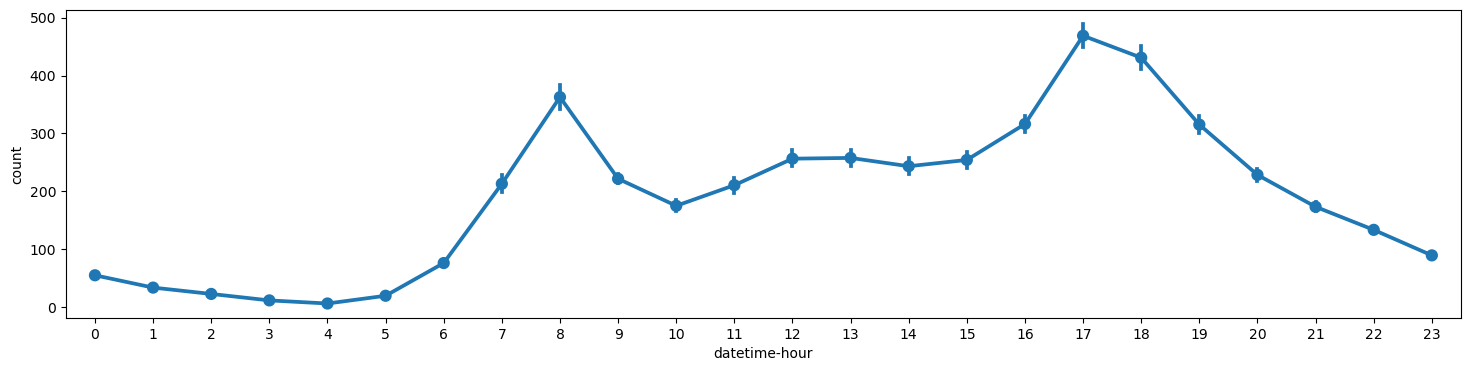

In [60]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train,x="datetime-hour",y="count")

<Axes: xlabel='datetime-hour', ylabel='count'>

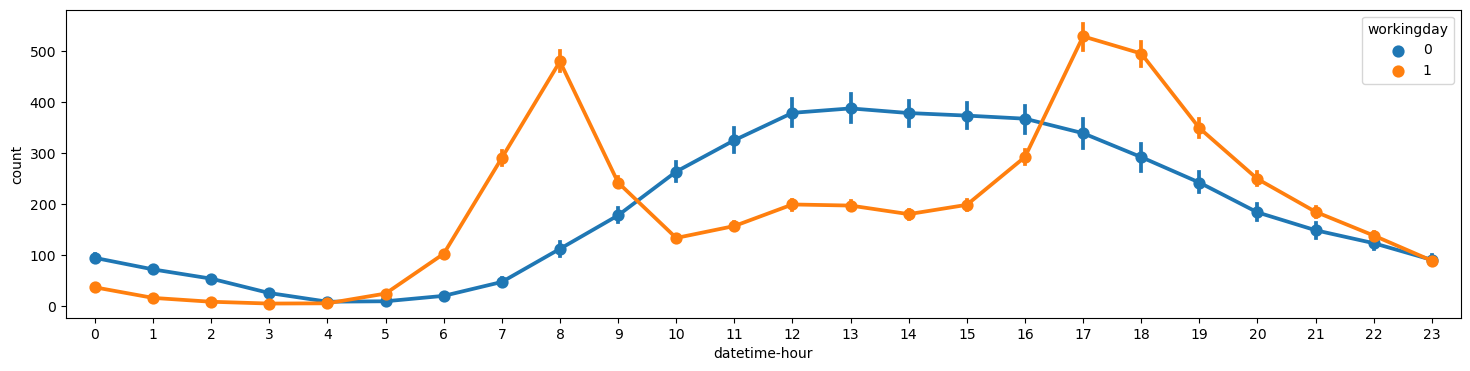

In [62]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train,x="datetime-hour",y="count",hue="workingday")

<Axes: xlabel='datetime-hour', ylabel='count'>

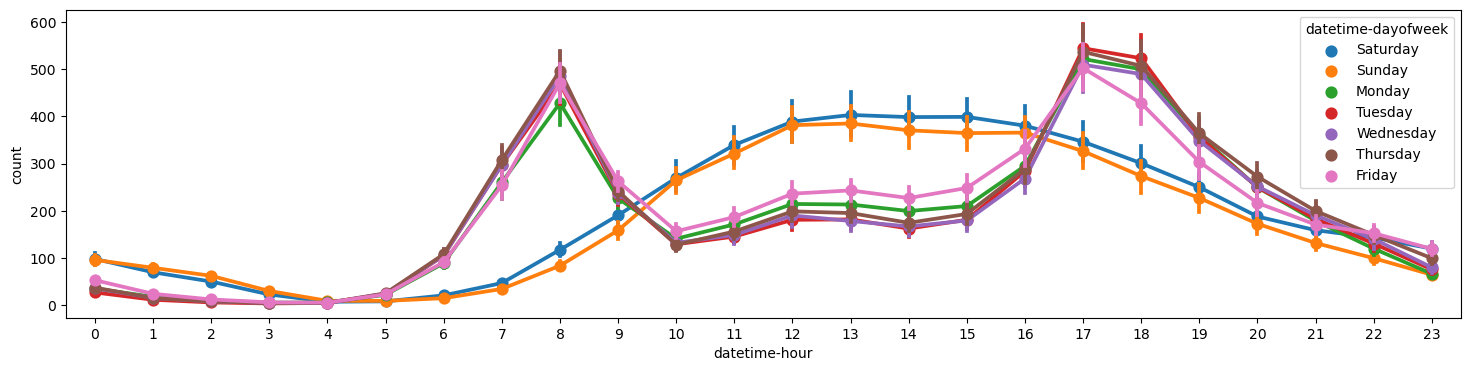

In [63]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train,x="datetime-hour",y="count",hue="datetime-dayofweek")